In [1]:
from math import log2
from scipy.special import comb
import matplotlib.pyplot as plt
from math import ceil, factorial

def find(x, k):
    ans = k
    while comb(ans, k) < x:
        ans += 1
    return ans

def log_find(log_x, k):
    ans = max(int(factorial(k) ** (1/k) * 2**(log_x/k)), k)
    comp = 0
    for i in range(k):
        comp += log2(ans-i) - log2(i+1)
    while comp < log_x:
        comp += log2(ans+1) - log2(ans - k + 1)
        ans += 1
    return ans

Plot the code length as a function of the Hamming weight. This plot shows clearly that there is a minimum for every $\bar{\lambda}$

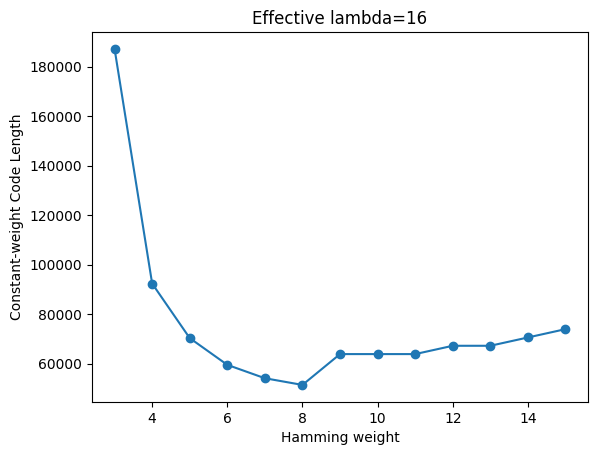

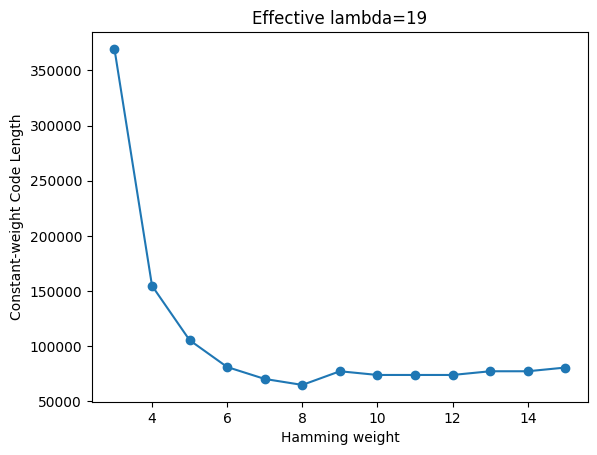

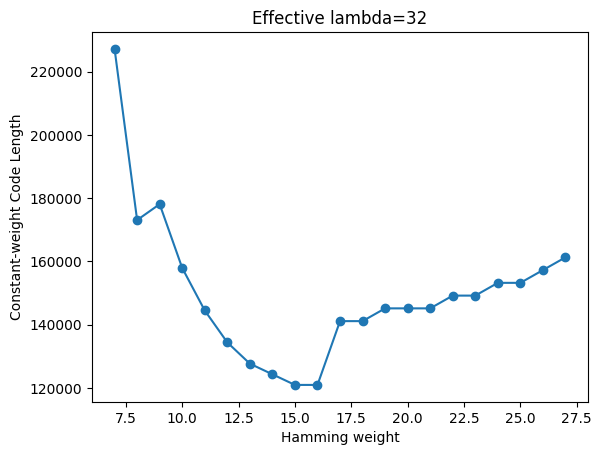

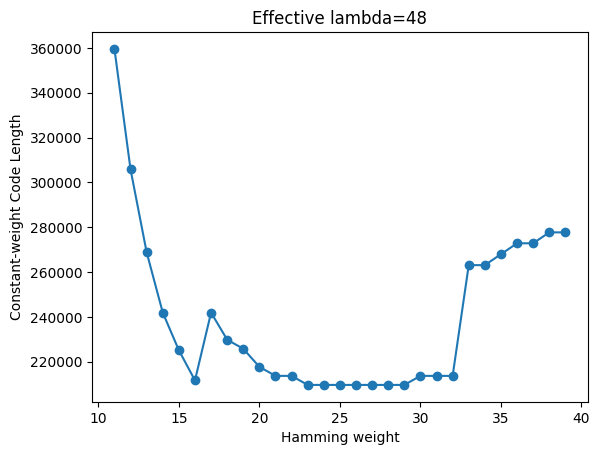

In [20]:
import pandas as pd

N_and_q_h = [
        (12, 72),
        (13, 144),
        (13, 192),
        (13, 208),
        (14, 240),
        (14, 288),
        (14, 348),
    ]

options = [
    (16,  3, 16),
    (19,  3, 16),
    (32,  7, 28),
    (48, 11, 40)
]

for _, (effective_lambda, start, end) in enumerate(options):
    hamming_weights = range(start, end)
    code_length = [log_find(effective_lambda, h) for h in hamming_weights]
    length_times_weight = [code_length[i]*N_and_q_h[ceil(log2(h))][1] * N_and_q_h[ceil(log2(h))][0] for i, h in enumerate(hamming_weights)]
    # plt.plot(hamming_weights, code_length)
    plt.plot(hamming_weights, length_times_weight, 'o-')
    opt_length = [effective_lambda for _ in hamming_weights] 
    # plt.plot(hamming_weights, opt_length)
    plt.title(f'Effective lambda={effective_lambda}')
    plt.xlabel('Hamming weight')
    plt.ylabel('Constant-weight Code Length')
    # plt.savefig(f'output-{effective_lambda}', dpi=500)
    plt.show()
    
    pd.DataFrame({
        'HammingWeight' : list(hamming_weights),
        'CodeLength' : code_length,
        'CodeLengthWeight' : length_times_weight,
        'OptLength' : opt_length,
    }).to_csv(f'output-{effective_lambda}.csv', index=False)

Finding the best Hamming weight for each 

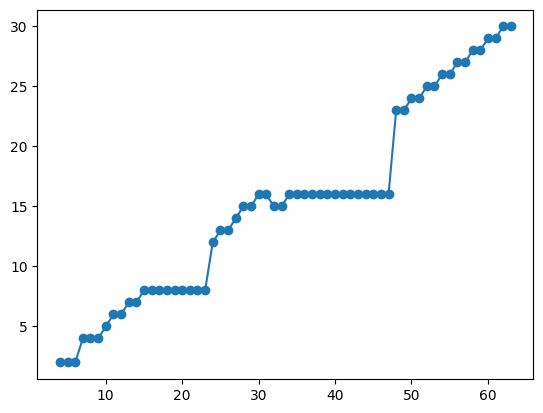

In [21]:
best_weights=[]
best_code_lengths=[]
effective_lambdas = range(4, 64)
for effective_lambda in effective_lambdas:
    start=effective_lambda//4
    end=3*effective_lambda//4
    hamming_weights = range(start, end)
    length_times_weight = [(log_find(effective_lambda, h)*N_and_q_h[ceil(log2(h))][1]*N_and_q_h[ceil(log2(h))][0],h) for h in hamming_weights]
    best_length, best_weight = min(length_times_weight)
    best_weights += [best_weight]
    best_code_lengths += [best_length]

plt.plot(effective_lambdas, best_weights, 'o-')
    
pd.DataFrame({
    'EffectiveBitlength' : list(effective_lambdas),
    'BestHammingWeight' : best_weights,
    'BestCodeLength' : best_code_lengths,
}).to_csv(f'best-hamming.csv', index=False)

In [22]:
print(best_weights)

[2, 2, 2, 4, 4, 4, 5, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 13, 13, 14, 15, 15, 16, 16, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30]


In [6]:
#Read all the csv files in '../experiments/results' using pandas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_csvs(path):
    df = pd.DataFrame()
    all=[]
    for filename in os.listdir(path):
        if filename.endswith('.csv'):
            all += [pd.read_csv(os.path.join(path, filename), names=['metric', 'value'], index_col=0).T]
    df = pd.concat(all, ignore_index=True)
    
    return df

[1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


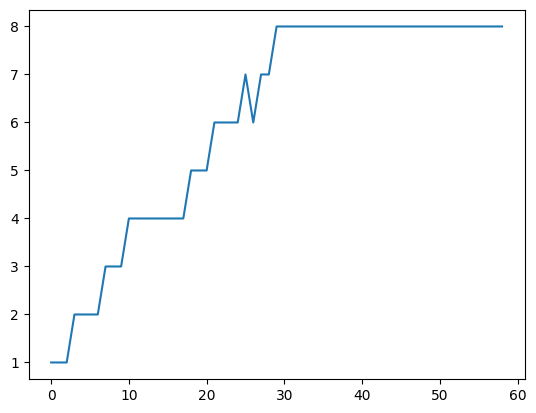

In [27]:
cols = [
    'effective_lambda',
    'hw',
    'time_server',
]

df = read_csvs('../experiments/results')
df = df[cols]
df_mean=df.groupby(['effective_lambda', 'hw']).mean()
df_std=df.groupby(['effective_lambda', 'hw']).std()
new_df = df_mean.reset_index()
ans=[]
for el in range(4,62):
    filtered_df = new_df[new_df['effective_lambda']==el]
    ans.append(filtered_df[filtered_df['time_server'] == filtered_df['time_server'].min()])


plt.plot(list(pd.concat(ans)['hw']))
print(list(pd.concat(ans)['hw']))

In [4]:
from scipy.special import comb
from math import sqrt, log2, ceil

def load(n, m):
    return ceil(m/n + 1.3*sqrt(2*m*log2(n) / n))

In [ ]:
"""
65536,8192,3145728,509
65536,8192,50331648,6597
65536,8192,805306368,100157
65536,16384,786432,93
65536,16384,3145728,281
65536,16384,12582912,938
""".split('\n')

In [6]:
xxx=[
    (8192,3145728,490),
    (8192,50331648,6541),
    (8192,805306368,99784),
    (16384,786432,85),
    (16384,3145728,262),
    (16384,12582912,916),
]

for n, m, t in xxx:
    print(n, m, load(n, m))

8192 3145728 514
8192 50331648 6664
8192 805306368 100383
16384 786432 96
16384 3145728 288
16384 12582912 959
